<a href="https://colab.research.google.com/github/tsancode/Population5/blob/main/Project_260722.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from tensorflow import keras
from keras import models
from keras import layers
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import seaborn as sns


In [6]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Proses untuk menggabungkan data, dengan batasan tahun 2014 - 2020

# New Section

In [23]:
df_data.isnull().iloc[:,1:].sum()

nama_provinsi          0
nama_kabupaten_kota    0
nama_kecamatan         0
nama_kelurahan         0
usia                   0
jenis_kelamin          0
jumlah_penduduk        0
AgeGroup               0
dtype: int64

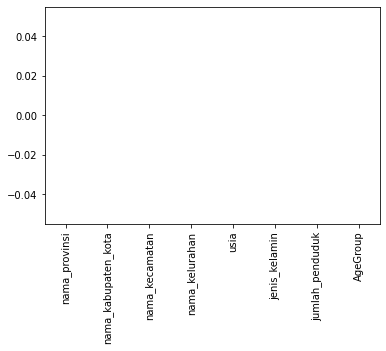

In [22]:
df_data.isnull().iloc[:,1:].sum().plot(kind='bar')

In [14]:
#collumns  = ['TAHUN', 'NAMA PROVINSI']
#df_p2013=pd.read_csv('/content/Project/dkikepadatankelurahan2013.csv', names=collumns)
df_p2014=pd.read_csv('/content/data-jumlah-penduduk-DKI_2014.csv')
df_p2015=pd.read_csv('/content/data-jumlah-penduduk-DKI_2015.csv')
df_p2016=pd.read_csv('/content/data-jumlah-penduduk-DKI_2016.csv')
df_p2017=pd.read_csv('/content/data-jumlah-penduduk-DKI_2017.csv')
df_p2018=pd.read_csv('/content/data-jumlah-penduduk-DKI_2018.csv')
df_p2019=pd.read_csv('/content/data-jumlah-penduduk-DKI_2019.csv')
df_p2020=pd.read_csv('/content/data-jumlah-penduduk-DKI_2020.csv')
#df_data = pd.concat([df_p2013,df_p2014,df_p2015, df_p2016, df_p2017, df_p2018, df_p2019, df_p2020]).reset_index(drop=True)
df_data = pd.concat([df_p2014.head(2000), df_p2015.head(2000), df_p2016.head(2000), df_p2017.head(2000), df_p2018.head(2000), df_p2019.head(2000), df_p2020.head(2000)], ignore_index=True)
# df_data = df_data.set_index('tahun')
#df_p2014.head(2000)
#df_data.shape
df_data

,tahun,nama_provinsi,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,usia,jenis_kelamin,jumlah_penduduk,Unnamed: 8
0,2014,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,0-4,Laki-laki,321,NaN
1,2014,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. KELAPA,0-4,Laki-laki,312,NaN
2,2014,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. HARAPAN,0-4,Laki-laki,80,NaN
3,2014,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. UNTUNG JAWA,0-4,Laki-laki,127,NaN
4,2014,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. TIDUNG,0-4,Laki-laki,221,NaN
...,...,...,...,...,...,...,...,...,...
13995,2020,DKI Jakarta,JAKARTA BARAT,KALI DERES,PEGADUNGAN,55-59,Laki-laki,2246,NaN
13996,2020,DKI Jakarta,JAKARTA BARAT,KALI DERES,PEGADUNGAN,60-64,Laki-laki,1394,NaN
13997,2020,DKI Jakarta,JAKARTA BARAT,KALI DERES,PEGADUNGAN,65-69,Laki-laki,741,NaN
13998,2020,DKI Jakarta,JAKARTA BARAT,KALI DERES,PEGADUNGAN,70-74,Laki-laki,414,NaN


In [20]:
# Remove Unnamed: 8 Columns yang Nan
df_data.drop('Unnamed: 8', axis=1, inplace=True)

In [21]:
df_data

,tahun,nama_provinsi,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,usia,jenis_kelamin,jumlah_penduduk,AgeGroup
0,2014,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,0-4,Laki-laki,321,BALITA
1,2014,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. KELAPA,0-4,Laki-laki,312,BALITA
2,2014,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. HARAPAN,0-4,Laki-laki,80,BALITA
3,2014,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. UNTUNG JAWA,0-4,Laki-laki,127,BALITA
4,2014,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. TIDUNG,0-4,Laki-laki,221,BALITA
...,...,...,...,...,...,...,...,...,...
13995,2020,DKI Jakarta,JAKARTA BARAT,KALI DERES,PEGADUNGAN,55-59,Laki-laki,2246,PELAJAR
13996,2020,DKI Jakarta,JAKARTA BARAT,KALI DERES,PEGADUNGAN,60-64,Laki-laki,1394,PELAJAR
13997,2020,DKI Jakarta,JAKARTA BARAT,KALI DERES,PEGADUNGAN,65-69,Laki-laki,741,LANSIA
13998,2020,DKI Jakarta,JAKARTA BARAT,KALI DERES,PEGADUNGAN,70-74,Laki-laki,414,LANSIA


In [70]:
df_data.loc[df_data['usia'] == '9-May', 'usia'] = '5-9'
df_data.loc[df_data['usia'] == '14-Oct', 'usia'] = '10-14'
df_data.loc[df_data['usia'] == '00-04', 'usia'] = '0-4'
df_data.loc[df_data['usia'] == '75+', 'usia'] = '70-74'
df_data.loc[df_data['usia'] == '05-09', 'usia'] = '5-9'
 

In [69]:
conditions =[
             
             (df_data['usia'] == '0-4'),
             (df_data['usia'] == '5-9') | (df_data['usia'] == '10-14') | (df_data['usia'] == '15-19'),
             (df_data['usia'] == '20-24') | (df_data['usia'] == '25-29') | (df_data['usia'] == '30-34') | (df_data['usia'] == '35-39') | (df_data['usia'] == '40-44') | (df_data['usia'] == '45-49') | (df_data['usia'] == '50-54') | (df_data['usia'] == '55-59') | (df_data['usia'] == '60-64'),
             (df_data['usia'] == '65-69') | (df_data['usia'] == '70-74')
]
values = ['BALITA','PELAJAR', 'PEKERJA', 'LANSIA']

df_data['AgeGroup'] = np.select(conditions, values)
df_data

,tahun,nama_provinsi,nama_kabupaten_kota,nama_kecamatan,nama_kelurahan,usia,jenis_kelamin,jumlah_penduduk,AgeGroup
0,2014,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. PANGGANG,0-4,Laki-laki,321,BALITA
1,2014,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. KELAPA,0-4,Laki-laki,312,BALITA
2,2014,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU UTR,P. HARAPAN,0-4,Laki-laki,80,BALITA
3,2014,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. UNTUNG JAWA,0-4,Laki-laki,127,BALITA
4,2014,PROVINSI DKI JAKARTA,KAB.ADM.KEP.SERIBU,KEP. SERIBU SLT,P. TIDUNG,0-4,Laki-laki,221,BALITA
...,...,...,...,...,...,...,...,...,...
13995,2020,DKI Jakarta,JAKARTA BARAT,KALI DERES,PEGADUNGAN,55-59,Laki-laki,2246,PEKERJA
13996,2020,DKI Jakarta,JAKARTA BARAT,KALI DERES,PEGADUNGAN,60-64,Laki-laki,1394,PEKERJA
13997,2020,DKI Jakarta,JAKARTA BARAT,KALI DERES,PEGADUNGAN,65-69,Laki-laki,741,LANSIA
13998,2020,DKI Jakarta,JAKARTA BARAT,KALI DERES,PEGADUNGAN,70-74,Laki-laki,414,LANSIA


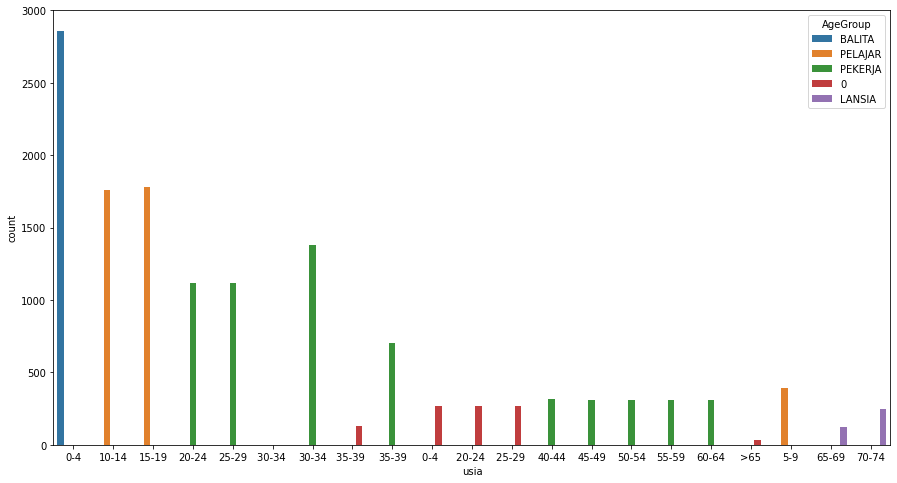

In [39]:
#pengelompokkan untuk klasifikasi usia
#BALITA
#PELAJAR
#PEKERJA
#LANSIA
fig, axes = plt.subplots(figsize=(15,8))
sns.countplot(x ='usia',hue='AgeGroup', data=df_data)

Dari hasil diatas dapat disimpulkan bahwa lebih banyak balita dari tingkat populasi setiap tahunnya.

In [47]:
df_train = df_data[df_data.usia.isnull()==False]
df_test = df_data[df_data.usia.isnull()==True]
df_test= df_test.drop('usia',axis=1)
	

In [58]:
X = df_train.drop('usia',axis=1)
y = df_train.usia

In [61]:
# Split the data to Train, and Test (75%, 25%)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [65]:
## Train the RF Model
RF = RandomForestClassifier(n_estimators=200)
# RF.fit(X_train,y_train)


In [ ]:
df.info()
df.describe
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TAHUN                 267 non-null    int64  
 1   NAMA PROVINSI         267 non-null    object 
 2   NAMA KABUPATEN/KOTA   267 non-null    object 
 3   NAMA KECAMATAN        267 non-null    object 
 4   NAMA KELURAHAN        267 non-null    object 
 5   LUAS WILAYAH (KM2)    267 non-null    float64
 6   KEPADATAN (JIWA/KM2)  267 non-null    int64  
 7   Unnamed: 7            0 non-null      float64
 8   Unnamed: 8            0 non-null      float64
 9   Unnamed: 9            0 non-null      float64
 10  Unnamed: 10           0 non-null      float64
 11  Unnamed: 11           0 non-null      float64
 12  Unnamed: 12           0 non-null      float64
 13  Unnamed: 13           0 non-null      float64
 14  Unnamed: 14           0 non-null      float64
 15  Unnamed: 15           0

Index(['TAHUN', 'NAMA PROVINSI', 'NAMA KABUPATEN/KOTA', 'NAMA KECAMATAN',
       'NAMA KELURAHAN', 'LUAS WILAYAH (KM2)', 'KEPADATAN (JIWA/KM2)',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', '35-39 Laki-Laki',
       '35-39 Perempuan', '40-44 Laki-Laki', '40-44 Perempuan',
       '45-49 Laki-Laki', '45-49 Perempuan', '50-54 Laki-Laki',
       '50-54 Perempuan', '55-59 Laki-Laki', '55-59 Perempuan',
       '60-64 Laki-Laki', '60-64 Perempuan', '65-69 Laki-Laki',
       '65-69 Perempuan', '70-74 Laki-Laki', '70-74 Perempuan',
       '>75 Laki-Laki', '>75  Perempuan'],
      dtype='object')

In [40]:
df_data.isnull().iloc[:,1:].sum()

nama_provinsi          0
nama_kabupaten_kota    0
nama_kecamatan         0
nama_kelurahan         0
usia                   0
jenis_kelamin          0
jumlah_penduduk        0
AgeGroup               0
dtype: int64